#### **Importing Libraries and Cleaning Data**

In [13]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt


# loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [14]:
# checking data types
df.dtypes

job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

In [15]:
# correcting data types
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [16]:
# Calculate percentage of null values in each column
null_count = df.isnull().sum()
null_percentage = df.isnull().sum() / len(df) * 100

# Combine into a DataFrame
null_df = pd.DataFrame({'Total Null Values': null_count, 'Percentage (%)': null_percentage})

null_df

,Total Null Values,Percentage (%)
job_title_short,0,0.000000
job_title,1,0.000127
job_location,1045,0.132995
job_via,8,0.001018
job_schedule_type,12667,1.612109
job_work_from_home,0,0.000000
search_location,0,0.000000
job_posted_date,0,0.000000
job_no_degree_mention,0,0.000000
job_health_insurance,0,0.000000


In [17]:
# dropping columns with more than 60% null values
df = df.drop(columns=['salary_rate', 'salary_year_avg', 'salary_hour_avg'])

In [18]:
# dropping rows will null values
df = df.dropna()

In [19]:
# dropping duplicate rows
df = df.drop_duplicates()

In [20]:
# Remove 'via' from the values in 'job_via' column
df['job_via'] = df['job_via'].str.replace(r'\s*via\s*', '', regex=True)

In [21]:
# Convert string representations of list into actual Python list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x))

In [22]:
# Convert string representations of dictionary into actual Python dictionary
df['job_type_skills'] = df['job_type_skills'].apply(lambda x: ast.literal_eval(x))

In [23]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."


#### **Questions to Answer**

1. Which job role has the highest number of job offers?
2. Which country has the highest number of job offers?
3. Which companies have posted the most job openings?
4. What is the most commonly used job posting platform?
5. What percentage of job postings offer work-from-home options, require a degree, or provide health insurance?
6. What are the most in-demand skills for the top three most popular data roles in the US?
7. What are the top trending skills for data engineers in the US?

#### **1. Which job role has the highest number of job offers?**

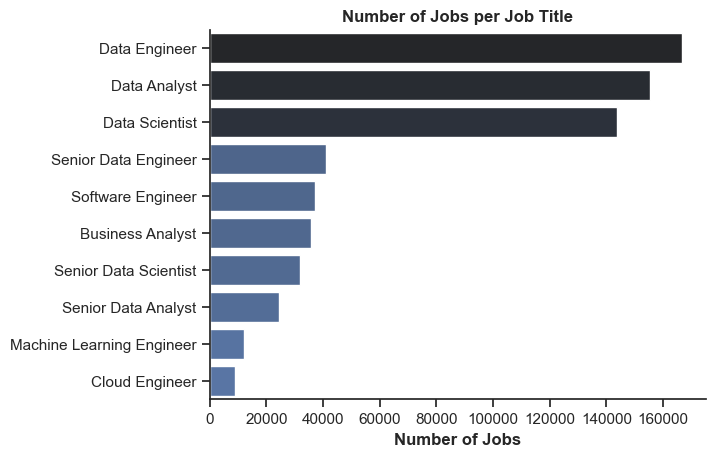

In [24]:
df_job_role = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_job_role, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title', weight='bold')
plt.xlabel('Number of Jobs', weight='bold')
plt.ylabel('')
plt.show()

#### **2. Which country has the highest number of job offers?**

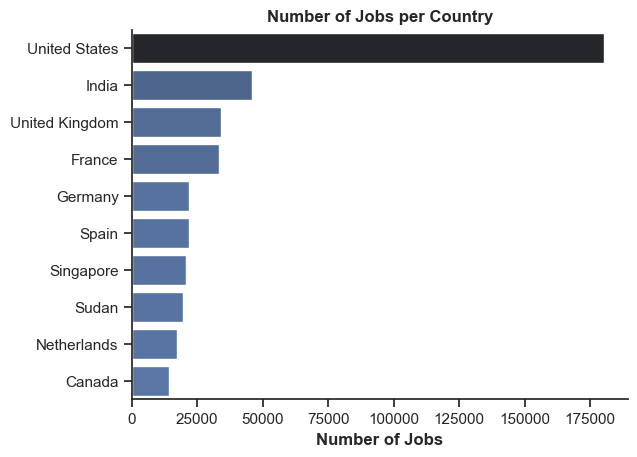

In [25]:
df_job_country = df['job_country'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_job_country, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country', weight='bold')
plt.xlabel('Number of Jobs', weight='bold')
plt.ylabel('')
plt.show()

#### **3. Which companies have posted the most job openings?**

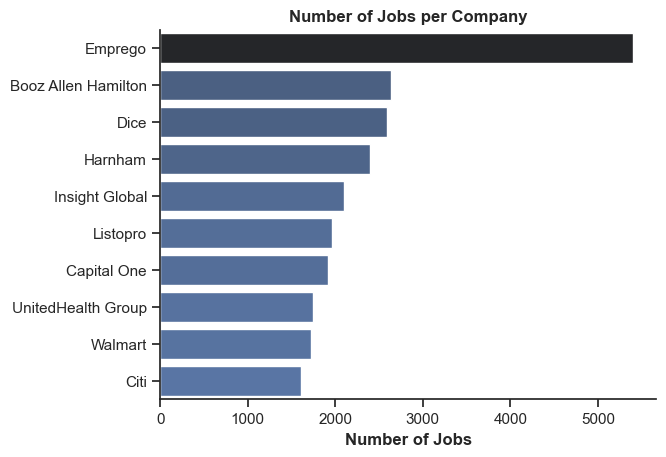

In [26]:
df_companies = df['company_name'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_companies, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company', weight='bold')
plt.xlabel('Number of Jobs', weight='bold')
plt.ylabel('')
plt.show()

#### **4. What is the most commonly used job posting platform?**

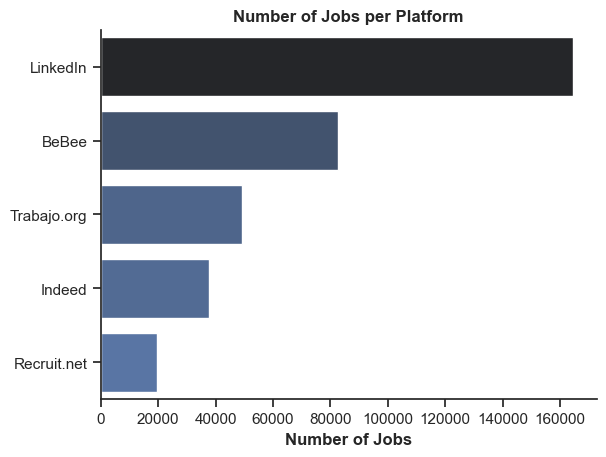

In [27]:
df_platform = df['job_via'].value_counts().to_frame().head(5)

sns.set_theme(style='ticks')
sns.barplot(data=df_platform, x='count', y='job_via', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Platform', weight='bold')
plt.xlabel('Number of Jobs', weight='bold')
plt.ylabel('')
plt.show()

#### **5. What percentage of job postings offer work-from-home options, require a degree, or provide health insurance?**

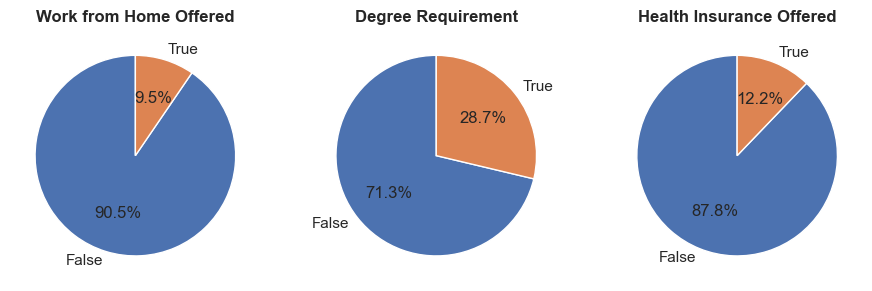

In [28]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title, weight='bold')

plt.show()

#### **6. What are the most in-demand skills for the top three most popular data roles in the US?**

In [29]:
# Filter the data for the market of the United States.
df_US = df[df['job_country'] == 'United States']

In [30]:
# Exploding the 'job_skills' column to have one skill per row
df_skills = df_US.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,aws
...,...,...
785692,Data Scientist- Hybrid Work Location,matlab
785692,Data Scientist- Hybrid Work Location,r
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [31]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42062
1521,sql,Data Analyst,33969
1523,sql,Data Scientist,29797
455,excel,Data Analyst,27117
1243,r,Data Scientist,25842
...,...,...,...
614,graphql,Business Analyst,1
613,google chat,Senior Data Engineer,1
331,dart,Software Engineer,1
1510,spss,Cloud Engineer,1


In [32]:
# Filter the job titles based on the most popular.
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

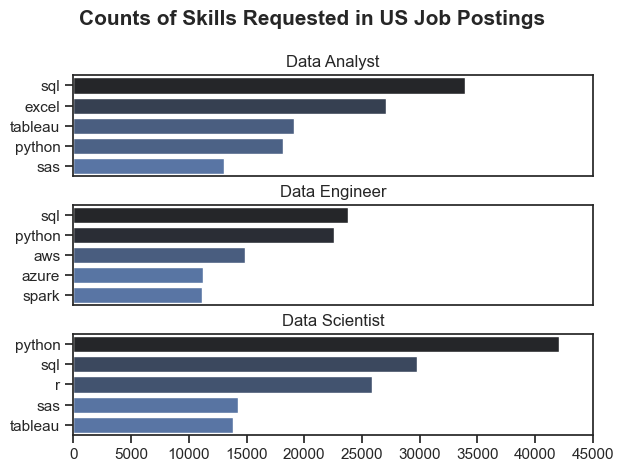

In [33]:
# Plot Skill Counts
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45000) # make the scales the same

    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize=15, weight='bold')
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

#### **7. What are the top trending skills for data engineering in the US?**

In [34]:
# Convert the 'job_posted_date' column to datetime format 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [35]:
# Skill count per month for data analysts
df_DA_US = df[(df['job_title'] == 'Data Engineer') & (df['job_country'] == 'United States')].copy()

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

In [36]:
# Group by month and job_skills
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,visual basic,vmware,vue,vue.js,watson,windows,wire,word,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,84,0,10,5,1,7,0,0,0,2,...,5,2,0,0,0,11,0,9,3,0
2,100,1,16,6,0,9,0,0,1,4,...,2,1,2,0,0,21,0,18,6,2
3,102,0,21,4,2,12,0,0,0,2,...,0,1,0,0,0,10,0,18,2,1
4,104,2,14,8,0,12,0,0,0,1,...,1,0,2,0,1,9,0,14,2,0
5,129,0,17,16,0,6,0,1,2,1,...,9,1,5,1,0,21,0,11,0,2
6,115,0,26,5,0,11,0,0,3,0,...,0,2,0,0,0,11,0,14,0,2
7,89,2,22,3,0,10,0,0,0,1,...,1,1,1,0,0,21,0,8,0,3
8,142,0,16,8,1,8,1,0,2,1,...,0,0,1,0,1,19,1,11,1,2
9,118,0,11,6,0,17,0,0,0,1,...,2,2,0,1,0,14,1,25,2,2


In [37]:
# sorts by count
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,python,aws,azure,spark,snowflake,java,tableau,hadoop,kafka,...,google chat,powerbi,clickup,qt,ringcentral,svelte,suse,shogun,arch,laravel
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,501,459,277,193,205,140,178,103,113,112,...,0,0,0,0,0,0,0,1,0,0
2,623,577,395,269,269,206,198,149,159,152,...,0,0,1,0,0,0,0,0,0,0
3,613,555,396,272,234,186,190,174,123,125,...,0,0,0,0,0,0,0,0,0,0
4,524,490,314,235,224,173,175,122,128,112,...,0,0,0,0,0,0,1,0,0,0
5,614,541,316,268,227,182,175,125,116,105,...,0,0,0,0,0,0,0,0,1,0
6,596,564,356,278,253,175,177,143,133,122,...,0,0,0,0,0,0,0,0,0,0
7,485,447,282,186,187,161,144,109,97,95,...,0,0,0,1,0,0,0,0,0,0
8,624,581,360,264,246,207,190,160,154,144,...,0,0,0,0,0,1,0,0,0,0
9,600,558,330,262,254,196,192,120,123,141,...,0,1,0,0,0,0,0,0,0,1


In [38]:
# Get monthly totals
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     673
2     822
3     817
4     700
5     758
6     785
7     625
8     787
9     807
10    790
11    757
12    616
dtype: int64

In [39]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_US_percent = df_DA_US_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,python,aws,azure,spark,snowflake,java,tableau,hadoop,kafka,...,google chat,powerbi,clickup,qt,ringcentral,svelte,suse,shogun,arch,laravel
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,74.442793,68.202080,41.158990,28.677563,30.460624,20.802377,26.448737,15.304606,16.790490,16.641902,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.148588,0.000000,0.000000
Feb,75.790754,70.194647,48.053528,32.725061,32.725061,25.060827,24.087591,18.126521,19.343066,18.491484,...,0.000000,0.000000,0.121655,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,75.030600,67.931457,48.470012,33.292534,28.641371,22.766218,23.255814,21.297430,15.055080,15.299878,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,74.857143,70.000000,44.857143,33.571429,32.000000,24.714286,25.000000,17.428571,18.285714,16.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000
May,81.002639,71.372032,41.688654,35.356201,29.947230,24.010554,23.087071,16.490765,15.303430,13.852243,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.131926,0.000000
Jun,75.923567,71.847134,45.350318,35.414013,32.229299,22.292994,22.547771,18.216561,16.942675,15.541401,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,77.600000,71.520000,45.120000,29.760000,29.920000,25.760000,23.040000,17.440000,15.520000,15.200000,...,0.000000,0.000000,0.000000,0.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,79.288437,73.824651,45.743329,33.545108,31.257942,26.302414,24.142313,20.330368,19.567980,18.297332,...,0.000000,0.000000,0.000000,0.00,0.000000,0.127065,0.000000,0.000000,0.000000,0.000000
Sep,74.349442,69.144981,40.892193,32.465923,31.474597,24.287485,23.791822,14.869888,15.241636,17.472119,...,0.000000,0.123916,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.123916


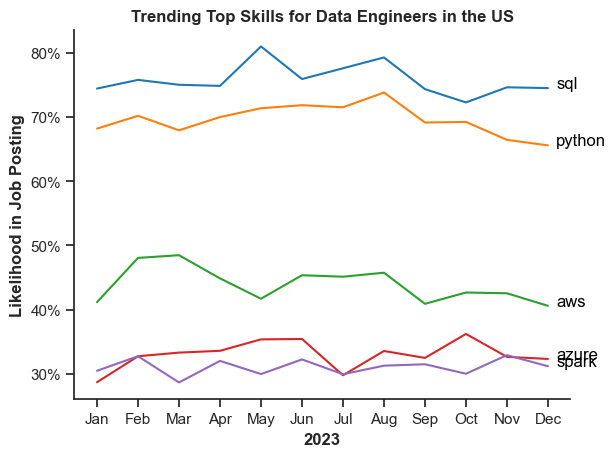

In [40]:
# Plot monthly skill demand
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_US_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Engineers in the US', weight='bold')
plt.ylabel('Likelihood in Job Posting', weight='bold')
plt.xlabel('2023', weight='bold')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()